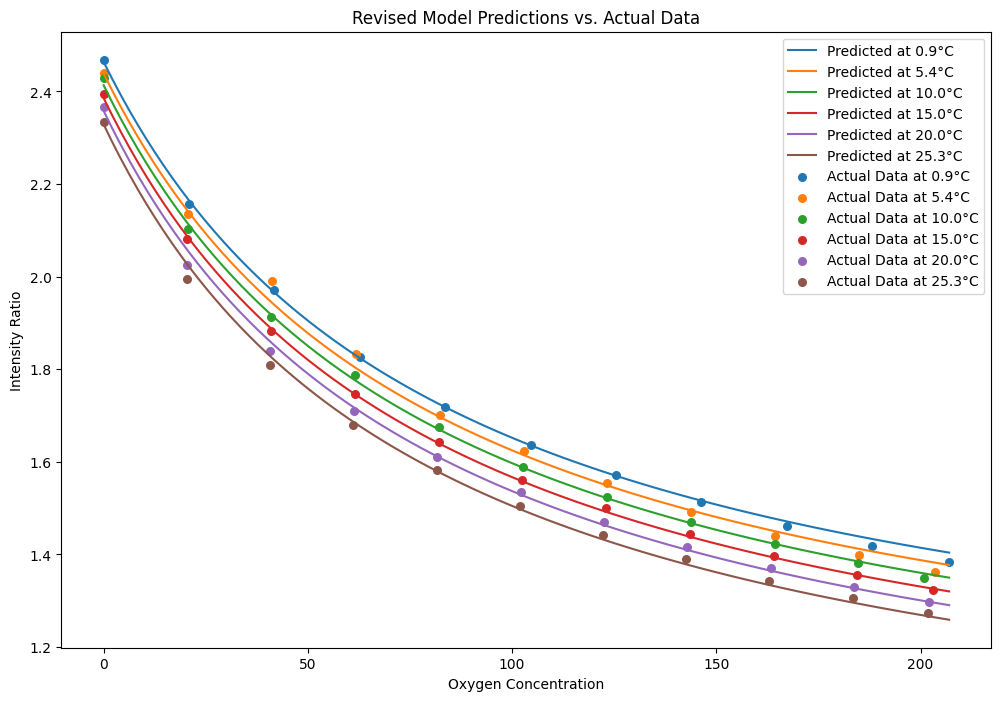

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load the data from the Excel file
file_path = 'D:/Calibrations.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)

# Averaging the intensity ratios for replicate oxygen levels at each temperature
averaged_data = data.groupby(['Temp', 'hPa']).mean().reset_index()
std_dev_data = data.groupby(['Temp', 'hPa']).std().reset_index()



# Define the revised multivariate non-linear model
def revised_multivariate_model(x, a0, a1, B, C, D):
    oxygen, temp = x
    return (a0 + a1 * temp) + B / (1 + C * oxygen * np.exp(-D * temp))

# Preparing the data for fitting with the averaged data
x_data_averaged = np.vstack((averaged_data['hPa'], averaged_data['Temp']))
y_data_averaged = averaged_data['Intensity Ratio']

# Fit the revised model to the averaged data
initial_guess = [1, 0, 1, 1, 1]  # Initial guesses for the parameters a0, a1, B, C, D
popt_revised_averaged, _ = curve_fit(revised_multivariate_model, x_data_averaged, y_data_averaged, p0=initial_guess)

# Extracted parameters for the revised model with averaged data
a0_fit_avg, a1_fit_avg, B_fit_avg, C_fit_avg, D_fit_avg = popt_revised_averaged

# Redefining the visualization function for the revised model
def visualize_revised_model(data, a0, a1, B, C, D):
    plt.figure(figsize=(12, 8))
    temperatures = data['Temp'].unique()
    for temp in temperatures:
        oxygen_range = np.linspace(0, data['hPa'].max(), 100)
        predictions = revised_multivariate_model((oxygen_range, np.full_like(oxygen_range, temp)), a0, a1, B, C, D)
        plt.plot(oxygen_range, predictions, label=f'Predicted at {temp}°C')
    for temp in temperatures:
        temp_data = data[data['Temp'] == temp]
        plt.scatter(temp_data['hPa'], temp_data['Intensity Ratio'], marker='o', s=30, label=f'Actual Data at {temp}°C')
    plt.xlabel('Oxygen Concentration')
    plt.ylabel('Intensity Ratio')
    plt.title('Revised Model Predictions vs. Actual Data')
    plt.legend()
    plt.show()

# Visualize the revised model with the new fitted parameters using averaged data
visualize_revised_model(averaged_data, a0_fit_avg, a1_fit_avg, B_fit_avg, C_fit_avg, D_fit_avg)


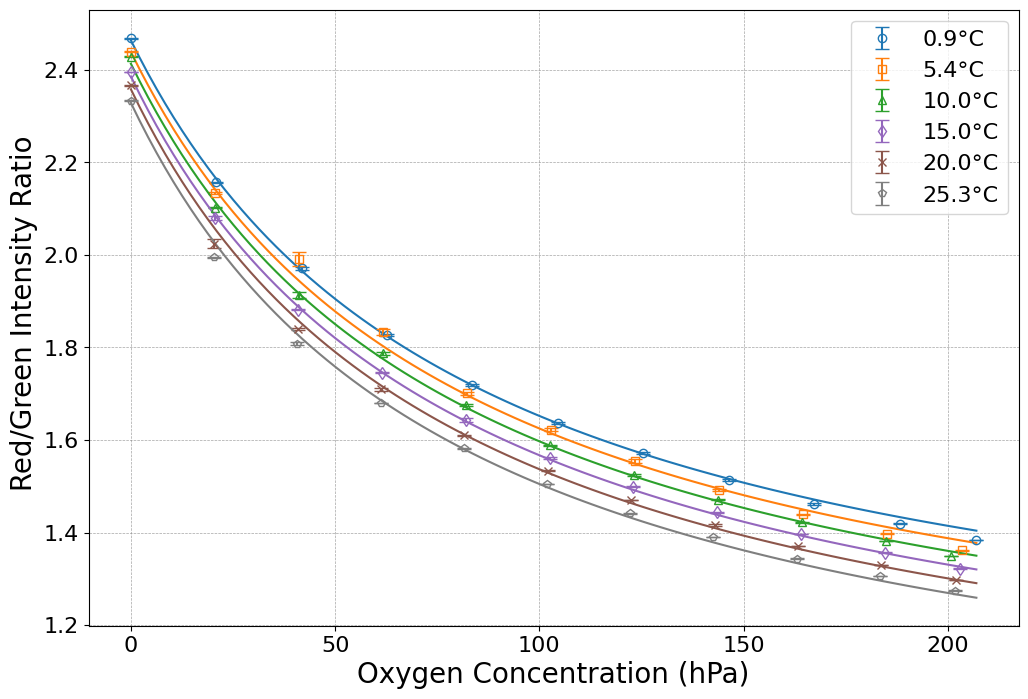

In [72]:
def visualize_revised_model(data, std_dev_data, a0, a1, B, C, D):
    plt.figure(figsize=(12, 8))
    temperatures = data['Temp'].unique()
    colors = plt.cm.tab10(np.linspace(0, 0.7, len(temperatures)))  # Unique colors for each temperature
    markers = ['o', 's', '^', 'd', 'x', 'p', '*']  # Different markers for each temperature

    for temp, color, marker in zip(temperatures, colors, markers):
        # Predictions
        oxygen_range = np.linspace(0, data['hPa'].max(), 100)
        predictions = revised_multivariate_model((oxygen_range, np.full_like(oxygen_range, temp)), a0, a1, B, C, D)
        plt.plot(oxygen_range, predictions,  color=color)

        # Actual data points
        temp_data = data[data['Temp'] == temp]
        temp_std_dev = std_dev_data[std_dev_data['Temp'] == temp]['Intensity Ratio']
        plt.errorbar(temp_data['hPa'], temp_data['Intensity Ratio'], yerr=temp_std_dev, fmt=marker, color=color, fillstyle='none', capsize=5, label=f'{temp}°C')

    plt.xlabel('Oxygen Concentration (hPa)', fontsize=20)
    plt.ylabel(' Red/Green Intensity Ratio', fontsize=20)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
    #plt.title('Revised Model Predictions vs. Actual Data with Standard Deviation', fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(fontsize=16)
    plt.savefig("Temp_comp.png", dpi=300)
    plt.show()

# Visualize the revised model with the new fitted parameters using averaged data and standard deviation
visualize_revised_model(averaged_data, std_dev_data, a0_fit_avg, a1_fit_avg, B_fit_avg, C_fit_avg, D_fit_avg)



In [52]:
# Define the range of oxygen concentrations
oxygen_range = np.arange(0, 200, 10)  # From 0 to 100 in steps of 10

# Define the specific temperatures for which to generate predictions
specific_temperatures = np.array([0.9 ,5.4, 10, 15, 20, 25.3])

# Create a grid of oxygen and specific temperature values
oxygen_grid, temp_grid = np.meshgrid(oxygen_range, specific_temperatures)

# Calculate predicted intensity ratios using the revised model
predicted_intensity_ratios = revised_multivariate_model((oxygen_grid.ravel(), temp_grid.ravel()), a0_fit_avg, a1_fit_avg, B_fit_avg, C_fit_avg, D_fit_avg)

# Create a new DataFrame for the predicted data
predicted_data = pd.DataFrame({
    'hPa': oxygen_grid.ravel(),
    'Temp': temp_grid.ravel(),
    'Intensity Ratio': predicted_intensity_ratios
})

predicted_data  # Displaying the first few rows of the new dataset


,hPa,Temp,Intensity Ratio
0,0,0.9,2.463550
1,10,0.9,2.303645
2,20,0.9,2.174865
3,30,0.9,2.068930
4,40,0.9,1.980255
...,...,...,...
115,150,25.3,1.361541
116,160,25.3,1.340042
117,170,25.3,1.320263
118,180,25.3,1.302005


C:\Users\au519867\AppData\Local\Temp\ipykernel_21116\833726252.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  parameters_df = parameters_df.append({'Temp': temp, 'k': popt[0], 'f': popt[1]}, ignore_index=True)
C:\Users\au519867\AppData\Local\Temp\ipykernel_21116\833726252.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  parameters_df = parameters_df.append({'Temp': temp, 'k': popt[0], 'f': popt[1]}, ignore_index=True)
C:\Users\au519867\AppData\Local\Temp\ipykernel_21116\833726252.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  parameters_df = parameters_df.append({'Temp': temp, 'k': popt[0], 'f': popt[1]}, ignore_index=True)
C:\Users\au519867\AppData\Local\Temp\ipykernel_21116\833726252.py:30: FutureWarning: 

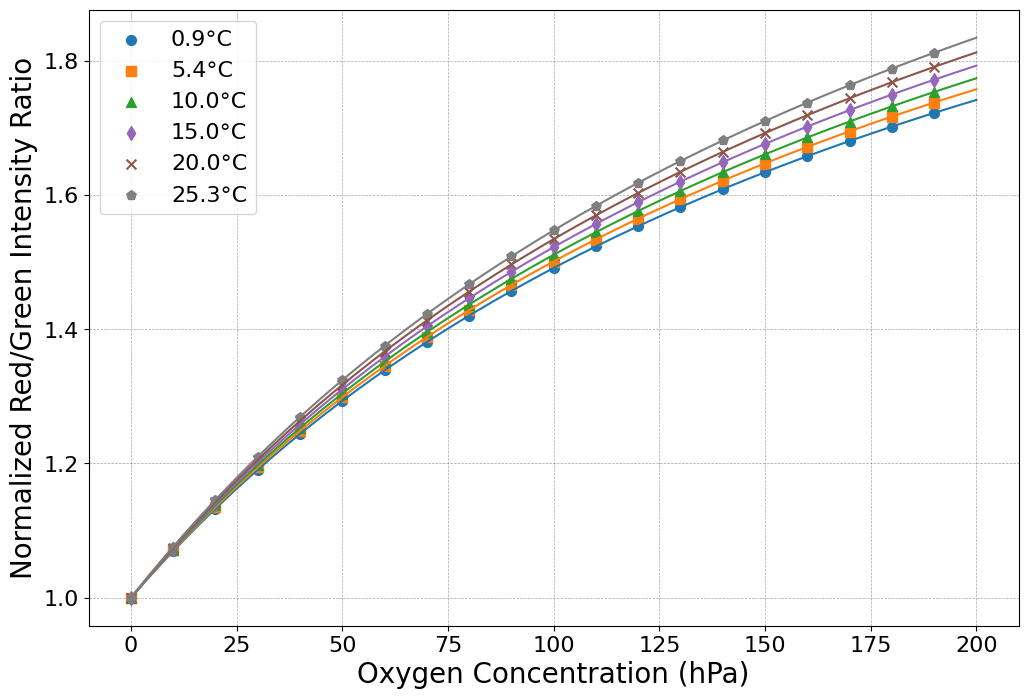

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Load the data from the Excel file

data = predicted_data

# Averaging the intensity ratios for replicate oxygen levels at each temperature
averaged_data = data.groupby(['Temp', 'hPa']).mean().reset_index()

# Normalizing the averaged data
averaged_data['Normalized Intensity Ratio'] = averaged_data.groupby('Temp')['Intensity Ratio'].transform(lambda x: x.iloc[0] / x)

# Define the modified Stern-Volmer equation
def modified_stern_volmer(x, k, f):
    return 1 / (f / (1 + k * x) + (1 - f))

# Fit the modified Stern-Volmer equation for each temperature
parameters_df = pd.DataFrame(columns=['Temp', 'k', 'f'])
initial_params = {'k': 0.165, 'f': 0.887}  # Initial parameter estimates

for temp in averaged_data['Temp'].unique():
    temp_data = averaged_data[averaged_data['Temp'] == temp]
    popt, _ = curve_fit(modified_stern_volmer, temp_data['hPa'], temp_data['Normalized Intensity Ratio'], p0=[initial_params['k'], initial_params['f']], bounds=([0, 0], [np.inf, 1]), maxfev=10000)
    parameters_df = parameters_df.append({'Temp': temp, 'k': popt[0], 'f': popt[1]}, ignore_index=True)

# Fit polynomial models for k and f
model_k = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
model_k.fit(parameters_df['Temp'][:, np.newaxis], parameters_df['k'])

model_f = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
model_f.fit(parameters_df['Temp'][:, np.newaxis], parameters_df['f'])

# Define the function for prediction
def predict_intensity_ratio(temp, oxygen, model_k, model_f):
    k_temp = model_k.predict([[temp]])[0]
    f_temp = model_f.predict([[temp]])[0]
    return 1 / (f_temp / (1 + k_temp * oxygen) + (1 - f_temp))

# Define the function for visualization
def visualize_predictions_normalized(temperatures, oxygen_range, model_k, model_f, normalized_data):
    plt.figure(figsize=(12, 8))

    # Viridis color scheme
    colors = plt.cm.tab10(np.linspace(0, 0.7, len(temperatures)))
    
    # Different marker shapes
    markers = ['o', 's', '^', 'd', 'x', 'p', '*']

    # Plot predicted data
    for temp, color in zip(temperatures, colors):
        predicted_ratios = [predict_intensity_ratio(temp, o2, model_k, model_f) for o2 in oxygen_range]
        plt.plot(oxygen_range, predicted_ratios, color=color)

    # Plot actual data with different shapes
    for temp, color, marker in zip(normalized_data['Temp'].unique(), colors, markers):
        temp_data = normalized_data[normalized_data['Temp'] == temp]
        plt.scatter(temp_data['hPa'], temp_data['Normalized Intensity Ratio'], marker=marker, s=50, color=color, label=f'{temp}°C')

    plt.xlabel('Oxygen Concentration (hPa)', fontsize=20)
    plt.ylabel('Normalized Red/Green Intensity Ratio', fontsize=20)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
  #plt.title('Revised Model Predictions vs. Actual Data with Standard Deviation', fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(fontsize=16)
    plt.show()

# Example use of visualization
example_temperatures = [0.9,5.5, 10, 15, 20, 25.3]  # Example temperatures in °C
oxygen_range_example = np.linspace(0, 200)  # Example range of oxygen concentrations
visualize_predictions_normalized(example_temperatures, oxygen_range_example, model_k, model_f, averaged_data)



In [58]:
# Create a DataFrame for the RO values
ro_values = averaged_data[averaged_data['hPa'] == 0][['Temp', 'Intensity Ratio']].rename(columns={'Intensity Ratio': 'RO'})

# Merge the RO values with the parameters_df to create the final table
final_table = pd.merge(ro_values, parameters_df, on='Temp')

# Display the table
print(final_table)


   Temp        RO         k         f
0   0.9  2.463550  0.012085  0.602010
1   5.4  2.438649  0.012159  0.608157
2  10.0  2.413195  0.012235  0.614572
3  15.0  2.385527  0.012318  0.621700
4  20.0  2.357859  0.012402  0.628995
5  25.3  2.328531  0.012491  0.636917


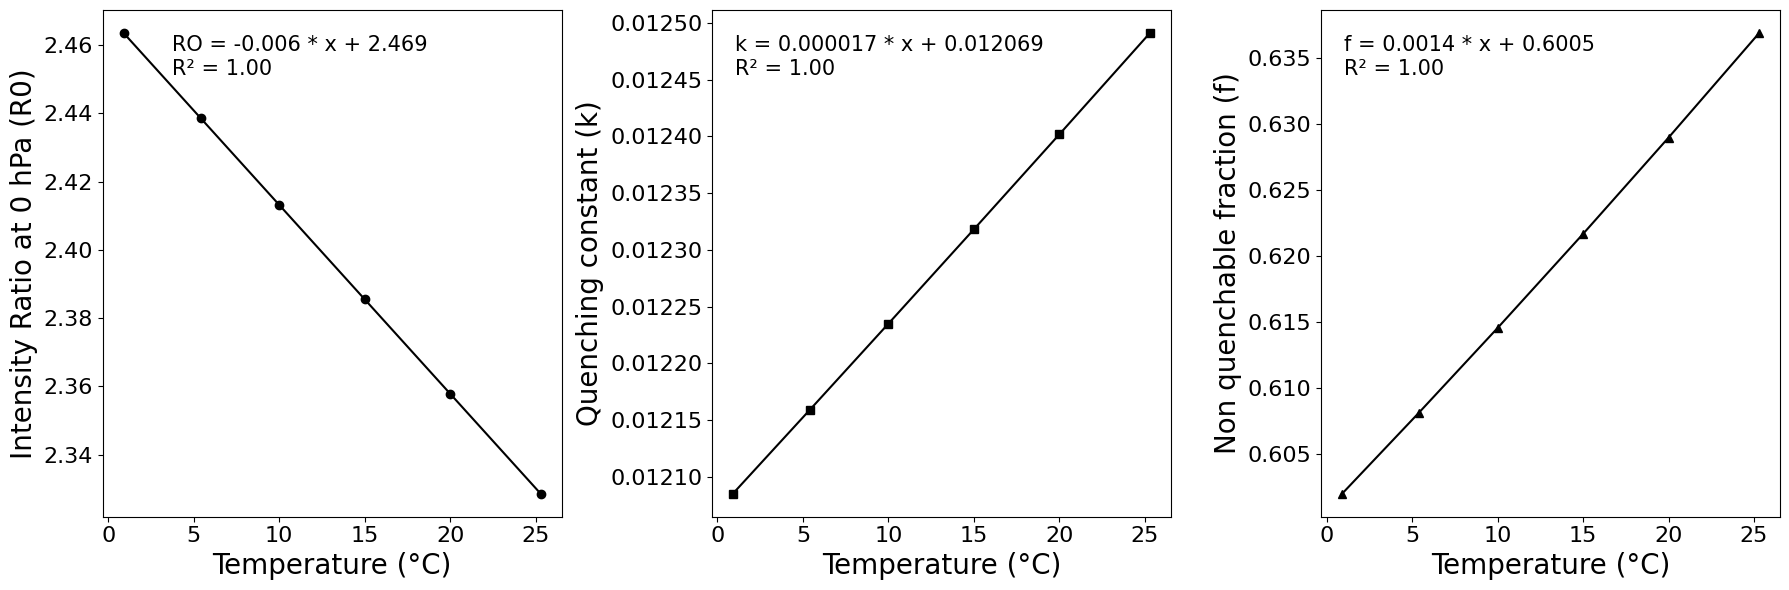

In [94]:
import matplotlib.pyplot as plt

# Assuming final_table is your DataFrame containing Temp, RO, k, and f
from sklearn.linear_model import LinearRegression

# Assuming final_table is your DataFrame containing Temp, RO, k, and f

# Initialize linear regression models
model_ro = LinearRegression()
model_k = LinearRegression()
model_f = LinearRegression()

# Perform linear regression and calculate R squared
# RO
X = final_table[['Temp']]
y_ro = final_table['RO']
model_ro.fit(X, y_ro)
r2_ro = model_ro.score(X, y_ro)

# k
y_k = final_table['k']
model_k.fit(X, y_k)
r2_k = model_k.score(X, y_k)

# f
y_f = final_table['f']
model_f.fit(X, y_f)
r2_f = model_f.score(X, y_f)

# Fitting function strings
fitting_function_ro = f'RO = {model_ro.coef_[0]:.3f} * x + {model_ro.intercept_:.3f} \nR² = {r2_ro:.2f}'
fitting_function_k = f'k = {model_k.coef_[0]:.6f} * x + {model_k.intercept_:.6f} \nR² = {r2_k:.2f}'
fitting_function_f = f'f = {model_f.coef_[0]:.4f} * x + {model_f.intercept_:.4f} \nR² = {r2_f:.2f}'

# [Continue with your plotting code, including the fitting_function strings in the text method for each subplot]


fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # Create 3 subplots in a row

# Define label and tick sizes
labelsize = 20
ticksize = 16

# Plot RO values and add fitting function label
axs[0].plot(final_table['Temp'], final_table['RO'], marker='o', linestyle='-', color='black')
#axs[0].set_title('RO vs. Temperature', fontsize=labelsize)
axs[0].set_xlabel('Temperature (°C)', fontsize=labelsize)
axs[0].set_ylabel('Intensity Ratio at 0 hPa (R0)', fontsize=labelsize)
axs[0].tick_params(axis='both', labelsize=ticksize)
axs[0].text(0.15, 0.95, fitting_function_ro, transform=axs[0].transAxes, fontsize=15, verticalalignment='top')

# Plot k values and add fitting function label
axs[1].plot(final_table['Temp'], final_table['k'], marker='s', linestyle='-', color='black')
#axs[1].set_title('k vs. Temperature', fontsize=labelsize)
axs[1].set_xlabel('Temperature (°C)', fontsize=labelsize)
axs[1].set_ylabel('Quenching constant (k)', fontsize=labelsize)
axs[1].tick_params(axis='both', labelsize=ticksize)
axs[1].text(0.05, 0.95, fitting_function_k, transform=axs[1].transAxes, fontsize=15, verticalalignment='top')

# Plot f values and add fitting function label
axs[2].plot(final_table['Temp'], final_table['f'], marker='^', linestyle='-', color='black')
#axs[2].set_title('f vs. Temperature', fontsize=labelsize)
axs[2].set_xlabel('Temperature (°C)', fontsize=labelsize)
axs[2].set_ylabel('Non quenchable fraction (f)', fontsize=labelsize)
axs[2].tick_params(axis='both', labelsize=ticksize)
axs[2].text(0.05, 0.95, fitting_function_f, transform=axs[2].transAxes, fontsize=15, verticalalignment='top')

plt.tight_layout()
plt.savefig("SternVolmer_parameters.png", dpi=300)
plt.show()
